# Advanced Classification

In this notebook, we will cover:

* Decision Tree Classifier
* Random Forest Classifier
* AdaBoost
* Hyperparameter Tuning by GridSearchCV
* Tuning by Randomize Search
* Voting Classifier

Importing all necessary packages

In [1]:
#!pip install pydotplus

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Task 1: Load Data 'titanic_clean.csv'

In [3]:
#write code here
data = pd.read_csv('titanic_clean.csv')
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


### Task 2: Do One Hot encoding for categorical varaibles and store in df

In [4]:
#write code here
df_OneHot=pd.get_dummies(df,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,138,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [5]:
# Write code here to copy into df
df=df_OneHot.copy()

### Task 3: Create dependent and independent varaibles

In [6]:
#write code here
X = df.drop(['PassengerId','Survived'], axis=1)
Y = df['Survived']

### Task 4: Split the data into training and testing set and set the random state to 100

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Write code here
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3,random_state=100)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 30) (623,)
(268, 30) (268,)


## Defining Decision Tree classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
clf_dt = DecisionTreeClassifier(
    max_depth=3, criterion='gini', random_state=100)

In [11]:
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [12]:
dt_pred = clf_dt.predict(xtest)
dt_pred_prb = clf_dt.predict_proba(xtest)[:, 1]

### Task 5: Find accuracy for Decision Tree

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
#write code here 
accuracy_dt = accuracy_score(ytest,dt_pred)
print("Accuracy: {}".format(accuracy_dt))

Accuracy: 0.8507462686567164


### Task 6: Find precision for Decision Tree

In [15]:
from sklearn.metrics import precision_score

In [16]:
#write code here 
precision_dt=precision_score(ytest,dt_pred)
print("Precision: {}".format(precision_dt))

Precision: 0.7857142857142857


### Task 7: Find Recall for Decision Tree

In [17]:
from sklearn.metrics import recall_score

In [18]:
#write code here 
recall_dt = recall_score(ytest,dt_pred)
print("Recall: {}".format(recall_dt))

Recall: 0.8020833333333334


### Task 8: Find F1 Score for Decision Tree

In [19]:
from sklearn.metrics import f1_score

In [20]:
#write code here 
dt_f1=f1_score(ytest,dt_pred)
print("F1 Score: {}".format(dt_f1))

F1 Score: 0.7938144329896908


### Task 9: Print Classification Report for Decision Tree

In [21]:
from sklearn.metrics import classification_report

In [22]:
# write code here
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       172
           1       0.79      0.80      0.79        96

    accuracy                           0.85       268
   macro avg       0.84      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



### ROC Curve<br>
Importing function to plot ROC AUC Curve

In [23]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [24]:
from plot_roc_curve import plot_roc_curve

In [25]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

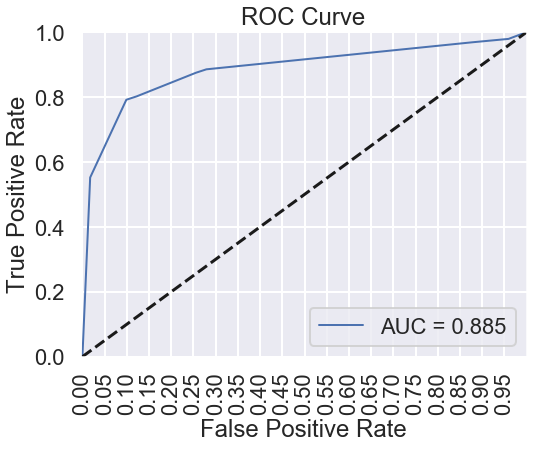

In [26]:
sns.set_context('poster')
auc_dt = roc_auc_score(ytest, dt_pred_prb)
fpr, tpr, threshold = roc_curve(ytest, dt_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_dt)

## Ploting Decision Tree

Loading packages

In [27]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

E:\python\anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Download Graphviz 2.38 from this [link](https://graphviz.gitlab.io/_pages/Download/Download_windows.html) and install. Then run below line as per your intallation path. (This step is one time)

In [28]:
#import os
#os.environ["Path"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [29]:
dot_data = StringIO()

In [30]:
export_graphviz(clf_dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=list(X.columns))

In [31]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [32]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

Exporting PNG file of Decision Trees

In [ ]:
graph.write_png('Decision Tree_Titanic.png')

## Features Importance

In [33]:
clf_dt.feature_importances_

array([0.        , 0.        , 0.06720923, 0.        , 0.13844724,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.59849287, 0.        , 0.06553138,
       0.        , 0.        , 0.08715219, 0.        , 0.        ,
       0.        , 0.        , 0.02084285, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02232423, 0.        ])

In [34]:
features_tuple = list(zip(X.columns, clf_dt.feature_importances_))

In [35]:
features_tuple

[('SibSp', 0.0),
 ('Parch', 0.0),
 ('Pclass_1', 0.06720923019824247),
 ('Pclass_2', 0.0),
 ('Pclass_3', 0.13844724222638327),
 ('Sex_female', 0.0),
 ('Sex_male', 0.0),
 ('Embarked_C', 0.0),
 ('Embarked_Q', 0.0),
 ('Embarked_S', 0.0),
 ('Title_Master', 0.0),
 ('Title_Miss', 0.0),
 ('Title_Mr', 0.5984928741149036),
 ('Title_Mrs', 0.0),
 ('Title_Rare Title', 0.06553137630060007),
 ('GrpSize_couple', 0.0),
 ('GrpSize_group', 0.0),
 ('GrpSize_large group', 0.08715219205067479),
 ('GrpSize_solo', 0.0),
 ('FareCat_0-10', 0.0),
 ('FareCat_100+', 0.0),
 ('FareCat_25-40', 0.0),
 ('FareCat_40-70', 0.02084285439629028),
 ('FareCat_70-100', 0.0),
 ('FareCat_Oct-25', 0.0),
 ('AgeCat_0-16', 0.0),
 ('AgeCat_16-32', 0.0),
 ('AgeCat_32-48', 0.0),
 ('AgeCat_48-64', 0.02232423071290549),
 ('AgeCat_64+', 0.0)]

In [36]:
feature_imp = pd.DataFrame(features_tuple, columns=[
                           "Feature Names", "Importance"])

In [37]:
feature_imp = feature_imp.sort_values("Importance", ascending=False)

Text(0.5, 1.0, 'Decision Classifier - Features Importance')

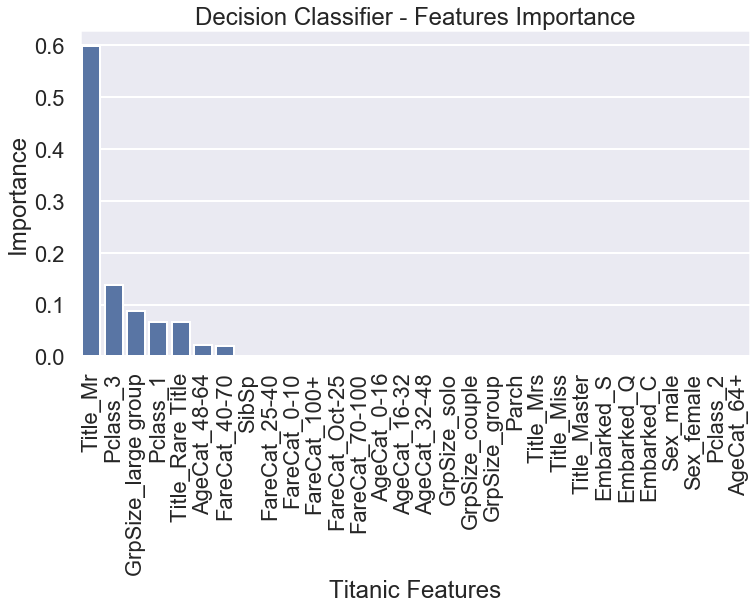

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Feature Names", y="Importance", data=feature_imp, color='b')
plt.xlabel("Titanic Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Decision Classifier - Features Importance")

# Random Forest

### Defining Random Forest classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
clf_rf = RandomForestClassifier(random_state=100)

In [41]:
clf_rf.fit(xtrain, ytrain)

E:\python\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [42]:
rf_pred = clf_rf.predict(xtest)
rf_pred_prb = clf_rf.predict_proba(xtest)[:, 1]

### Task 10: Find Precision for Random Forest

In [43]:
#write code here 
precision_rf=precision_score(ytest,rf_pred)
print("Precision: {}".format(precision_rf))

Precision: 0.7171717171717171


### Task 11: Find Accuracy for Random Forest

In [44]:
#write code here 
accuracy_rf = accuracy_score(ytest,rf_pred)
print("Accuracy: {}".format(accuracy_rf))

Accuracy: 0.8022388059701493


### Task 12: Find Recall for Random Forest

In [45]:
#write code here 
recall_rf = recall_score(ytest,rf_pred)
print("Recall: {}".format(recall_rf))

Recall: 0.7395833333333334


### Task 13: Find F1 Score for Random Forest

In [46]:
#write code here 
rf_f1=f1_score(ytest,rf_pred)
print("F1 Score: {}".format(rf_f1))

F1 Score: 0.7282051282051282


### Task 14: Print Classification Report for Random Forest

In [47]:
from sklearn.metrics import classification_report

In [48]:
# write code here
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       172
           1       0.72      0.74      0.73        96

    accuracy                           0.80       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



### ROC Curve for Random Forest

In [49]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

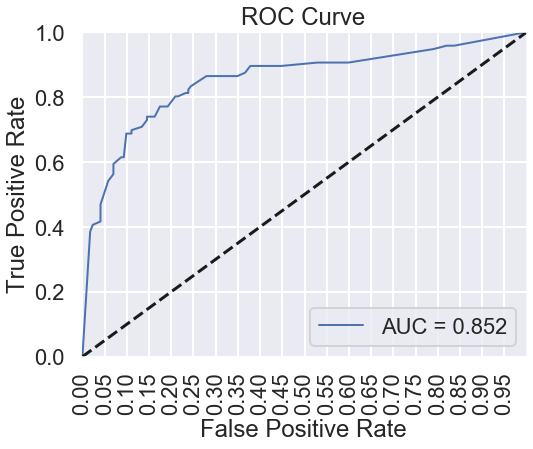

In [50]:
auc_rf = roc_auc_score(ytest, rf_pred_prb)
fpr, tpr, threshold = roc_curve(ytest, rf_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_rf)

### Features Importance

In [51]:
features_tuple = list(zip(X.columns, clf_rf.feature_importances_))

In [52]:
feature_imp = pd.DataFrame(features_tuple, columns=[
                           "Feature Names", "Importance"])

In [53]:
feature_imp = feature_imp.sort_values("Importance", ascending=False)

Text(0.5, 1.0, 'Random Forest Classifier - Features Importance')

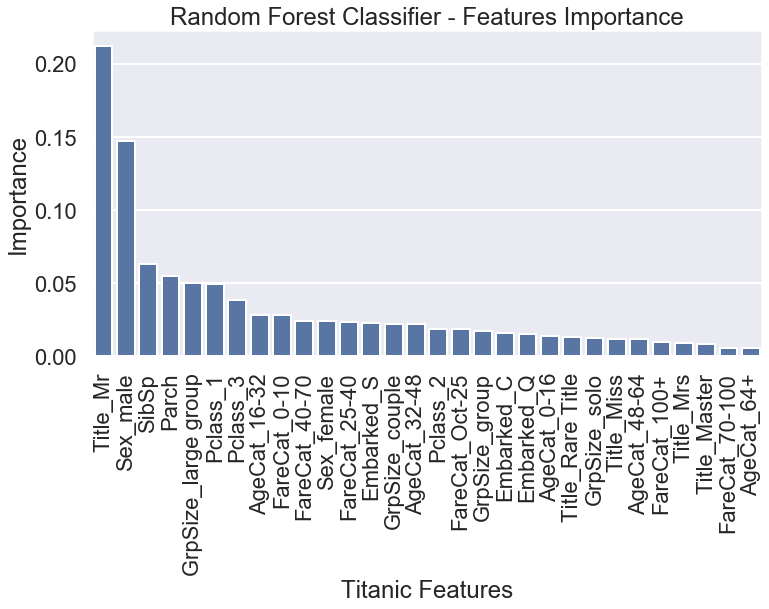

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Feature Names", y="Importance", data=feature_imp, color='b')
plt.xlabel("Titanic Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

## Hyperparameter Tuning using GridSearchCV

Importing GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

Making grid of parameters and running GridSearch CV

In [56]:
param_grid1 = {"n_estimators": [9, 18, 27, 36, 45, 54, 63],
               "max_depth": [1, 5, 10, 15, 20, 25, 30],
               "min_samples_leaf": [1, 2, 4, 6, 8, 10]}

RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=5, scoring='accuracy', n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain, ytrain)

# RF_cv1.cv_results_,
RF_cv1.best_params_, RF_cv1.best_score_

({'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 18},
 0.8250401284109149)

So we found **'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 18** as optimum parameters

Let's try new set of parameter values near to optimum.

In [57]:
param_grid2 = {"n_estimators": [9, 12, 15, 18, 21, 24, 27],
               "max_depth": [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
               "min_samples_leaf": [1, 2, 3, 4]}

RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv2 = GridSearchCV(RF, param_grid2, cv=5, scoring='accuracy', n_jobs=4)

# Fit it to the data
RF_cv2.fit(xtrain, ytrain)

# RF_cv2.grid_scores_,
RF_cv2.best_params_, RF_cv2.best_score_

({'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 15},
 0.826645264847512)

 So we found **'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 15** as optimum parameters

### Tuned Random Forest

In [58]:
RF_grid = RF_cv2.best_estimator_

In [59]:
RF_grid.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [60]:
rf_pred_t = RF_grid.predict(xtest)
rf_pred_prb_t = RF_grid.predict_proba(xtest)[:, 1]

### Task 15: Find Accuracy for Tuned Random Forest

In [61]:
#write code here 
accuracy_rf_t = accuracy_score(ytest,rf_pred_t)
print("Accuracy after tuning: {}".format(accuracy_rf_t))

Accuracy after tuning: 0.835820895522388


### Task 16: Find Recall for Tuned Random Forest

In [62]:
#write code here 
recall_rf_t=recall_score(ytest,rf_pred_t)
recall_rf_t

0.8020833333333334

### Task 17: Find Precision for Tuned Random Forest

In [63]:
#write code here 
precision_rf_t=precision_score(ytest, rf_pred_t)
precision_rf_t

0.7549019607843137

### Task 18: Find F1 Score

In [64]:
#write code here 
rf_t_f1=f1_score(ytest,rf_pred_t)
rf_t_f1

0.7777777777777777

### Task 19: Print Classification Report for Tuned Random Forest

In [65]:
# write code here
print(classification_report(ytest,rf_pred_t))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       172
           1       0.75      0.80      0.78        96

    accuracy                           0.84       268
   macro avg       0.82      0.83      0.82       268
weighted avg       0.84      0.84      0.84       268



### ROC Curve for Tuned Random Forest

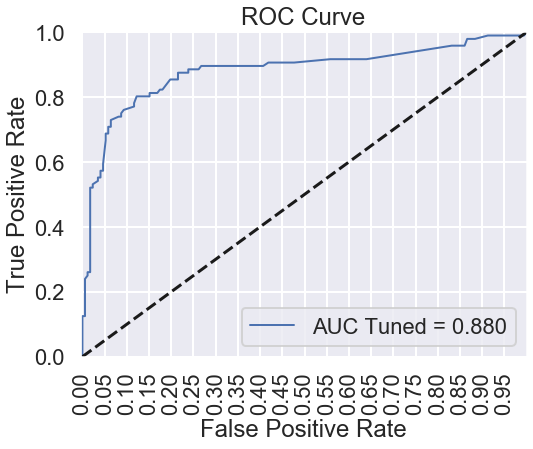

In [66]:
auc_rf_t = roc_auc_score(ytest, rf_pred_prb_t)
fpr, tpr, threshold = roc_curve(ytest, rf_pred_prb_t)
plot_roc_curve(fpr, tpr, label='AUC Tuned = %0.3f' % auc_rf_t)

### Hyperparameters Tuning Using Randomized Search

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
rf_rs = RandomForestClassifier(random_state=100)

In [69]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

In [70]:
random_grid1 = {"n_estimators": n_estimators,
                "max_depth": max_depth,
                "min_samples_split": min_samples_split}

In [71]:
rf_random = RandomizedSearchCV(
    estimator=rf_rs, param_distributions=random_grid1, n_iter=50, cv=5, verbose=2, random_state=100)
# Fit the random search model
rf_random.fit(xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=   0.7s
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=   0.6s
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............
[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=   0.6s
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............
[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=   0.6s
[CV] n_estimators=450, min_samples_split=10, max_depth=80 ............
[CV]  n_estimators=450, min_samples_split=10, max_depth=80, total=   0.6s
[CV] n_estimators=560, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=30, total=   0.8s
[CV] n_estimators=560, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=30, total=   0.7s
[CV] n_estimators=560, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=30, total=   1.1s
[CV] n_estimators=560, min_samples_split=5, max_depth=30 ..

[CV]  n_estimators=890, min_samples_split=2, max_depth=40, total=   1.1s
[CV] n_estimators=890, min_samples_split=2, max_depth=40 .............
[CV]  n_estimators=890, min_samples_split=2, max_depth=40, total=   1.0s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=   0.6s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=   0.5s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=   0.6s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=   0.5s
[CV] n_estimators=560, min_samples_split=5, max_depth=80 .............
[CV]  n_estimators=560, min_samples_split=5, max_depth=80, total=   0.5s
[CV] n_estimators=780, min_samples_split=10, max_depth=50 .....

[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=   0.9s
[CV] n_estimators=780, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=   0.9s
[CV] n_estimators=780, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=   0.9s
[CV] n_estimators=780, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=   1.0s
[CV] n_estimators=780, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=780, min_samples_split=2, max_depth=60, total=   0.9s
[CV] n_estimators=340, min_samples_split=5, max_depth=110 ............
[CV]  n_estimators=340, min_samples_split=5, max_depth=110, total=   0.4s
[CV] n_estimators=340, min_samples_split=5, max_depth=110 ............
[CV]  n_estimators=340, min_samples_split=5, max_depth=110, total=   0.3s
[CV] n_estimators=340, min_samples_split=5, max_depth=110 ...

[CV]  n_estimators=340, min_samples_split=5, max_depth=20, total=   0.4s
[CV] n_estimators=340, min_samples_split=5, max_depth=20 .............
[CV]  n_estimators=340, min_samples_split=5, max_depth=20, total=   0.3s
[CV] n_estimators=340, min_samples_split=5, max_depth=20 .............
[CV]  n_estimators=340, min_samples_split=5, max_depth=20, total=   0.3s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=890, min_samples_split=5, max_depth=30, total=   1.0s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=890, min_samples_split=5, max_depth=30, total=   1.1s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=890, min_samples_split=5, max_depth=30, total=   1.1s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 .............
[CV]  n_estimators=890, min_samples_split=5, max_depth=30, total=   1.1s
[CV] n_estimators=890, min_samples_split=5, max_depth=30 ......

[CV]  n_estimators=340, min_samples_split=10, max_depth=100, total=   0.4s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=   0.4s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=   0.4s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=   0.4s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=   0.4s
[CV] n_estimators=340, min_samples_split=2, max_depth=60 .............
[CV]  n_estimators=340, min_samples_split=2, max_depth=60, total=   0.4s
[CV] n_estimators=670, min_samples_split=2, max_depth=90 .............
[CV]  n_estimators=670, min_samples_split=2, max_depth=90, total=   1.0s
[CV] n_estimators=670, min_samples_split=2, max_depth=90 ....

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

**Selecting the best classifier**

In [72]:
clf_rf_rand = rf_random.best_estimator_

In [73]:
clf_rf_rand.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [74]:
pred_rf_rand = clf_rf_rand.predict(xtest)

In [75]:
prb_rf_rand = clf_rf_rand.predict_proba(xtest)[:, 1]

### Task 20: Find the Accuracy of Tuned Random Forest through Randomized Search

In [76]:
#write code here 
accuracy_rf_r= accuracy_score(ytest,pred_rf_rand)
accuracy_rf_r

0.832089552238806

### Task 21: Find the Precision of Tuned Random Forest through Randomized Search

In [77]:
#write code here 
precision_rf_r=precision_score(ytest,pred_rf_rand)
precision_rf_r

0.7475728155339806

### Task 22: Find the Recall of Tuned Random Forest through Randomized Search

In [78]:
#write code here 
recall_rf_r=recall_score(ytest,pred_rf_rand)
recall_rf_r

0.8020833333333334

### Task 23: Find the F1-Score of Tuned Random Forest through Randomized Search

In [79]:
#write code here 
f1_rf_r=f1_score(ytest,pred_rf_rand)
f1_rf_r

0.7738693467336684

### Task 24: Print the Classification Report of Tuned Random Forest through Randomized Search

In [80]:
# write code here
print(classification_report(ytest,pred_rf_rand))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       172
           1       0.75      0.80      0.77        96

    accuracy                           0.83       268
   macro avg       0.82      0.83      0.82       268
weighted avg       0.84      0.83      0.83       268



### ROC Curve

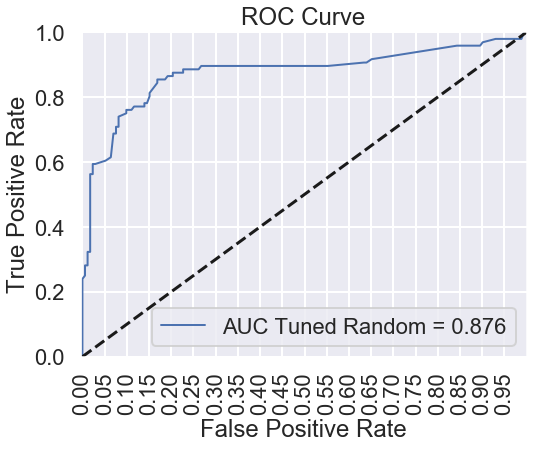

In [81]:
auc_rf_r = roc_auc_score(ytest, prb_rf_rand)
fpr, tpr, threshold = roc_curve(ytest, prb_rf_rand)
plot_roc_curve(fpr, tpr, label='AUC Tuned Random = %0.3f' % auc_rf_r)

# Ada Boost

In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=100)

In [84]:
pred_clf_adb = clf_adb.predict(xtest)

In [85]:
adb_pred_prb = clf_adb.predict_proba(xtest)[:, 1]

### Task 25: Find Accuracy for Ada Boost

In [95]:
# write code here
accuracy_adb = accuracy_score(ytest,pred_clf_adb)
accuracy_adb

0.8283582089552238

### Task 26: Find Precision for Ada Boost

In [96]:
# write code here
precision_adb = precision_score(ytest,pred_clf_adb)
precision_adb

0.7272727272727273

### Task 27: Find Recall for Ada Boost

In [97]:
# write code here
recall_adb = recall_score(ytest,pred_clf_adb)
recall_adb

0.8333333333333334

### Task 28: Find F1 Score for Ada Boost

In [98]:
# write code here
f1_adb = f1_score(ytest,pred_clf_adb)
f1_adb

0.7766990291262137

### Task 29: Print Classification Report for Ada Boost

In [99]:
# write code here
print(classification_report(ytest,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       172
           1       0.73      0.83      0.78        96

    accuracy                           0.83       268
   macro avg       0.81      0.83      0.82       268
weighted avg       0.84      0.83      0.83       268



### ROC Curve

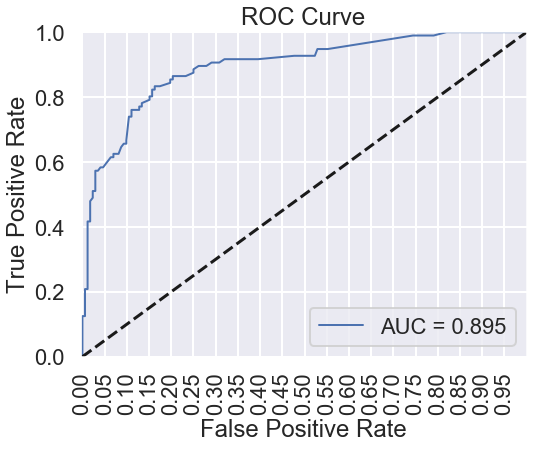

In [91]:
auc_adb = roc_auc_score(ytest, adb_pred_prb)
fpr, tpr, threshold = roc_curve(ytest, adb_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_adb)

# XGBoost

## Extreme Gradient Boosting Algorithm

In [94]:
!pip install xgboost

In [100]:
import xgboost as xgb

In [101]:
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)

In [102]:
clf_xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=100, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=25, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [103]:
xgb_pred = clf_xgb.predict(xtest)
xgb_pred_prb=clf_xgb.predict_proba(xtest)[:,1]

### Task 30: Find Accuracy of XGBoost

In [104]:
#write code here 
accuracy_xgb = accuracy_score(ytest,xgb_pred)
print("Accuracy: {}".format(accuracy_xgb))

Accuracy: 0.7985074626865671


In [ ]:
### Task 31: Find  Recall of XGBoost

In [105]:
#write code here 
recall_xgb = recall_score(ytest,xgb_pred)
recall_xgb

0.7395833333333334

###  Task 32: Find  Precision of XGBoost

In [106]:
#write code here 
precision_xgb = precision_score(ytest,xgb_pred)
precision_xgb

0.71

### Task 33: Find F1 Score XGB

In [107]:
#write code here 
xgb_f1=f1_score(ytest,xgb_pred)
xgb_f1

0.7244897959183674

### Task 34: Print Classification Report of XGBoost

In [108]:
#write code here 
print(classification_report(xgb_pred,ytest))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       168
           1       0.74      0.71      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



### ROC Curve

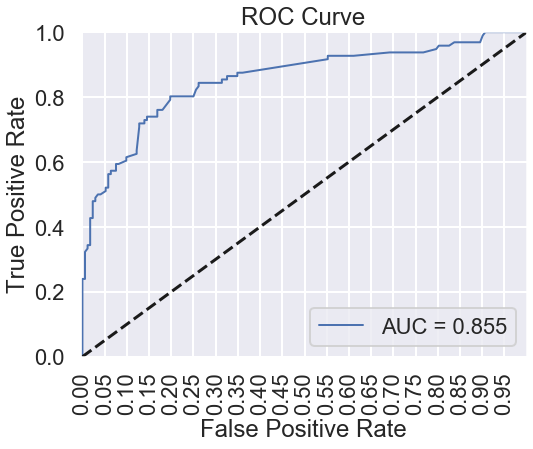

In [109]:
auc_xgb=roc_auc_score(ytest,xgb_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,xgb_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_xgb)

# Comparison

In [110]:
comparison_dict={"Algorithm":["Decision Tree","Random Forest","Tuned Random Forest(Grid)","Tuned Random Forest(Random)","XGBoost","Ada Boost"],
                 "Accuracy":[accuracy_dt,accuracy_rf,accuracy_rf_t,accuracy_rf_r,accuracy_xgb,accuracy_adb],
                 "Precision":[precision_dt,precision_rf,precision_rf_t,precision_rf_r,precision_xgb,precision_adb],
                 "Recall":[recall_dt,recall_rf,recall_rf_t,recall_rf_r,recall_xgb,recall_adb],
                 "AUC":[auc_dt,auc_rf,auc_rf_t,auc_rf_r,auc_xgb,auc_adb],
                 "F1 Score":[dt_f1,rf_f1,rf_t_f1,f1_rf_r,xgb_f1,f1_adb]
                }

In [111]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall', 'Accuracy', 'AUC'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,AUC,F1 Score
5,Ada Boost,0.828358,0.727273,0.833333,0.895409,0.776699
0,Decision Tree,0.850746,0.785714,0.802083,0.885356,0.793814
2,Tuned Random Forest(Grid),0.835821,0.754902,0.802083,0.880178,0.777778
3,Tuned Random Forest(Random),0.832090,0.747573,0.802083,0.875575,0.773869
1,Random Forest,0.802239,0.717172,0.739583,0.851956,0.728205
4,XGBoost,0.798507,0.710000,0.739583,0.855227,0.724490


# Submission on Kaggle

### Task 30: Import test data

In [112]:
# Write code here
test = pd.read_csv('competition_clean.csv')
df_test = test.copy()
df_test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,892,3,male,0,0,Q,Mr,solo,0-10,32-48
1,893,3,female,1,0,S,Mrs,couple,0-10,32-48
2,894,2,male,0,0,Q,Mr,solo,0-10,48-64
3,895,3,male,0,0,S,Mr,solo,0-10,16-32
4,896,3,female,1,1,S,Mrs,group,10-25,16-32


### Task 31: Do One Hot encoding of test data

In [113]:
# write code here
df_OneHot = pd.get_dummies(df_test,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot.head()
df_test =df_OneHot

### Task 32: Separate Passenger ID for submission

In [114]:
# Write code here
PassengerId=df_test['PassengerId']
df_test.drop('PassengerId',axis=1,inplace=True)

### Task 33: Do prediction through final model

In [116]:
# write code here
pred_final = clf_adb.predict(df_test)

#### Creating Data Frame for submission

In [118]:
submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': pred_final})

In [119]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Task 34: Export the dataset into csv file

In [120]:
# Write code here
submission.to_csv('my_submission v2.0.csv', index=False)